In [2]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

In [3]:
# example 7.31, 7.32
'''Suppose a pharmaceutical company has developed a new drug for lowering blood pressure, and they
are preparing a clinical trial (experiment) to test the drug's effectiveness. They recruit people who
are taking a particular standard blood pressure medication. People in the control group will continue
to take their current medication through generic-looking pills to ensure blinding. Write down the
hypotheses for a two-sided hypothesis test in this context.'''
'''The researchers would like to run the clinical trial on patients with systolic blood pressures between
140 and 180 mmHg. Suppose previously published studies suggest that the standard deviation of the
patients' blood pressures will be about 12 mmHg and the distribution of patient blood pressures will
be approximately symmetric.26 If we had 100 patients per group, what would be the approximate
standard error for xbar_trmt xbar_ctrl?'''
print('''a)
H0: the new drug performs exactly as well as the standard medication (u_trtmnt - u_ctrl = 0)
HA: the new drug's performance differs from the standard medication (u_trtmnt - u_ctrl != 0)''')
n = np.array([100,100])
s = np.array([12,12])
se = np.sqrt( sum((s**2)/n) )
se

a)
H0: the new drug performs exactly as well as the standard medication (u_trtmnt - u_ctrl = 0)
HA: the new drug's performance differs from the standard medication (u_trtmnt - u_ctrl != 0)


1.697056274847714

after we set the rejection areas for null model and practically significant effect sizes, we may proceed to calculating the statistical power. our null distribution for the difference of two means will be (x1-x2 = 0) approximately normal distribution if sample size is bigger than 30, centered at 0. but for example, if we set a practical value of -3 units- the sampling thistribution for (x1-x2 = -3) will be the same distribution but shifted to the left by 3.

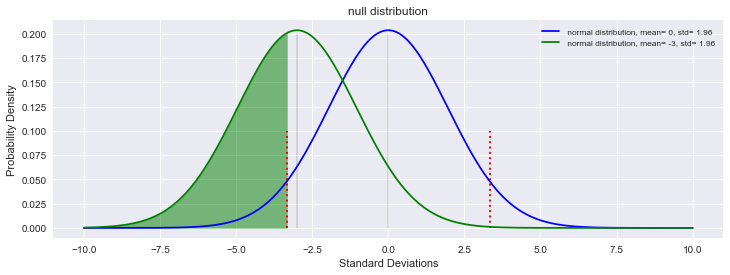

In [38]:
# example 7.31, 7.32, 7.33, 7.34, 7.35
n = 100
s = 12
se = np.sqrt( (s**2/n) + (s**2/n ) )
mean_null = 0
mean_practical = -3
z = z95
me = [se*z95, (se*z95)*(-1)]
means = [0,-3]

fig = plt.figure(figsize=(12,4))
x = np.linspace(-10, 10, 1500)
ax = fig.add_subplot(1,1,1)
y = stats.norm(mean_null, z).pdf(x)
z = stats.norm(mean_null, z).pdf(x)
ax.plot(x, y, color='blue',label=f' normal distribution, mean= {mean_null}, std= {z95}'.format(mean=mean_null))

y = stats.norm(mean_practical, std).pdf(x)
ax.plot(x, y, color='green',label=f' normal distribution, mean= {mean_practical}, std= {z95}'.format(mean=mean_null))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('null distribution')
ax.vlines(x=me, ymin=0, ymax=0.1, colors='red', lw=2,linestyles="dotted")
ax.vlines(x=means, ymin=0, ymax=0.2, colors='black', lw=2,alpha=0.1)
legend = ax.legend(shadow=True,fontsize='small')
ax.fill_between(x, y, color='green', alpha=0.5, where = (x<min(me)) )